In [93]:
from models.utils import load_model, get_color_word_associations
from data.utils import get_concept_list, load_templates, load_human_ratings, get_colors
from experiments.utils import plot_color_association_comparison
from config.config import DATASET_COLOR_DICT, ROOT
from scipy import stats
from config.parser import parser
import os
import torch
import numpy as np

In [94]:
from models.utils import *
from data.utils import *
from experiments.utils import *
from config.config import *
import sklearn.manifold

In [95]:
model, processor = load_model("clip")
prompts = load_templates("cifar100") # "custom"
colors = np.random.randint(low=0, high=255, size=(32, 32, 3), dtype=np.uint8)
colors_to_test = ["red", "green", "blue", "purple", "yellow", "orange", "brown", "black", "white", "cyan"]

text_embedding_list = []
colors_list = []
colored_concept_list = []
concept_color = 0
concept = "apple"

for color in colors_to_test:
    colored_concept = f"{color} {concept}"
    if color == "cyan":
        colored_concept = concept
    
    encoded_image, text_embeddings = get_model_embeddings(colored_concept, prompts, colors, processor, model)
    text_embedding_list.extend([np.array(embed[0]) for embed in text_embeddings])
    colors_list.extend([color for i in range(len(encoded_image))])
    colored_concept_list.extend([prompt.replace("{}", colored_concept) for prompt in prompts])
    concept_color += 1

text_embedding_list = np.stack(text_embedding_list)

100%|██████████| 14/14 [00:01<00:00, 10.15it/s]


In [96]:
tsne = sklearn.manifold.TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(text_embedding_list)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 140 samples in 0.001s...
[t-SNE] Computed neighbors for 140 samples in 0.100s...
[t-SNE] Computed conditional probabilities for sample 140 / 140
[t-SNE] Mean sigma: 0.242888
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.026283
[t-SNE] KL divergence after 1000 iterations: 0.347019


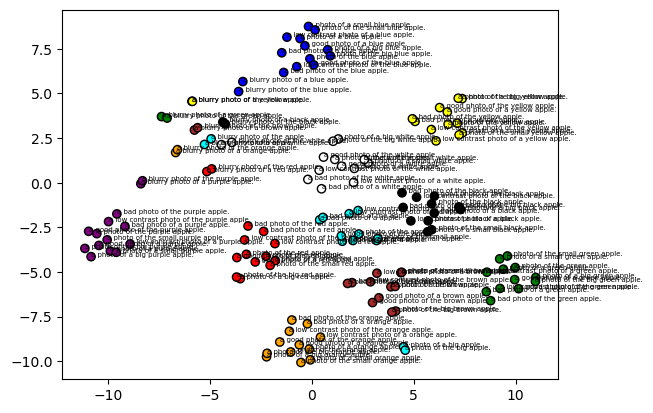

In [100]:
# Creating figure
# fig = plt.figure(figsize = (5, 5))

# plt.scatter(z[:,0], z[:,1], c=colors_list, edgecolors="black")
# plt.title("Color Embedding TSNE Visualization")
# # show plot
# plt.show()

fig, ax = plt.subplots()
ax.scatter(z[:,0], z[:,1], c=colors_list, edgecolors="black")

for i in range(len(z[:,0])):
    ax.annotate(colored_concept_list[i], (z[i,0], z[i,1]), size=5)

In [102]:
model, processor = load_model("clip")
prompts = load_templates("cifar100") # "custom"
prompts = [prompt for prompt in prompts if "blurry" not in prompt]
colors = np.random.randint(low=0, high=255, size=(32, 32, 3), dtype=np.uint8)
colors_to_test = ["red", "green", "blue", "purple", "yellow", "orange", "brown", "black", "white", "cyan"]

text_embedding_list = []
colors_list = []
colored_concept_list = []
concept_color = 0
concept = "apple"

for color in colors_to_test:
    colored_concept = f"{color} {concept}"
    if color == "cyan":
        colored_concept = concept
    
    encoded_image, text_embeddings = get_model_embeddings(colored_concept, prompts, colors, processor, model)
    text_embedding_list.extend([np.array(embed[0]) for embed in text_embeddings])
    colors_list.extend([color for i in range(len(encoded_image))])
    colored_concept_list.extend([prompt.replace("{}", colored_concept) for prompt in prompts])
    concept_color += 1

text_embedding_list = np.stack(text_embedding_list)

100%|██████████| 12/12 [00:01<00:00, 10.41it/s]


In [103]:
tsne = sklearn.manifold.TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(text_embedding_list)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 120 samples in 0.001s...
[t-SNE] Computed neighbors for 120 samples in 0.069s...
[t-SNE] Computed conditional probabilities for sample 120 / 120
[t-SNE] Mean sigma: 0.240132
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.504395
[t-SNE] KL divergence after 1000 iterations: 0.286411


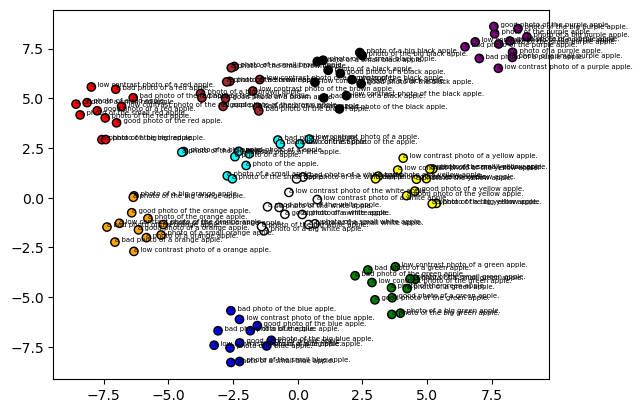

In [104]:
fig, ax = plt.subplots()
ax.scatter(z[:,0], z[:,1], c=colors_list, edgecolors="black")

for i in range(len(z[:,0])):
    ax.annotate(colored_concept_list[i], (z[i,0], z[i,1]), size=5)